In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC 
import mglearn
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X,y = make_blobs(centers =4, random_state=8)
y = y%2
linear_svm = LinearSVC().fit(X,y)

Text(0,0.5,'Feature 1')

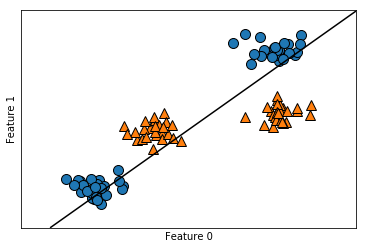

In [3]:
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'feature 1**2')

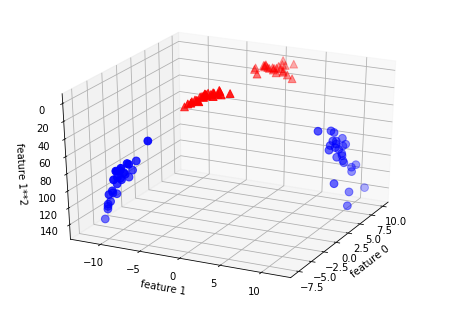

In [4]:
#np.vstack(tup),沿着竖直方向将矩阵堆叠起来。
#np.hstack(tup),沿着水平方向将数组堆叠起来。
# ** 表示幂 - 返回x的y次幂， a**b 为a的b次方，例如2**3 结果 8
#２番目の特徴量の２乗を追加
X_new = np.hstack([X,  X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1],X_new[mask, 2], c="b",  cmap=mglearn.cm2,  s=60)
# ~ 表示按位取反运算符：对数据的每个二进制位取反,即把1变为0,把0变为1 。
# ~x 类似于 -x-1 (~a ) 输出结果 -61 ，二进制解释： 1100 0011，在一个有符号二进制数的补码形式。
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2],c="r", marker="^", cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1**2")

Text(0.5,0,'feature1 ** 2')

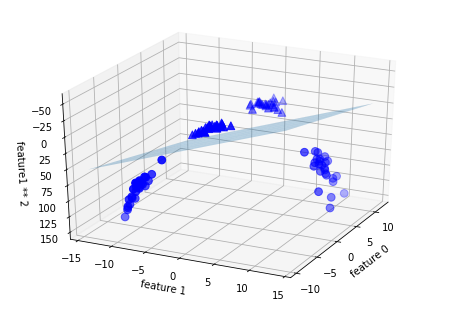

In [5]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#線形決定境界を描画（びょうが）
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim =-26)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None) 在指定的间隔内返回均匀间隔的数字。
#返回num均匀分布的样本，在[start, stop]。
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2 ,50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2 ,50)
XX,YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
#plot_surface的使用：https://www.numpy.org.cn/reference/routines/statistics.html#
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c="b", marker="^",cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

Text(0,0.5,'Feature 1')

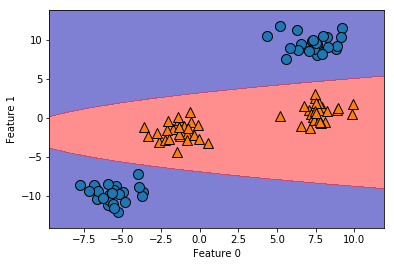

In [6]:
ZZ = YY **2
#np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
#np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

#plt.contourf()画三维等高图：https://blog.csdn.net/lens___/article/details/83960810
plt.contourf(XX,YY,dec.reshape(XX.shape), levels =[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [7]:
#np.c_

# a = np.array([[1, 2, 3],[7,8,9]])
# b=np.array([[4,5,6],[1,2,3]])
 
# a
# Out[4]: 
# array([[1, 2, 3],
#        [7, 8, 9]])
 
# b
# Out[5]: 
# array([[4, 5, 6],
#        [1, 2, 3]])
 
# c=np.c_[a,b]
 
# c
# Out[7]: 
# array([[1, 2, 3, 4, 5, 6],
#        [7, 8, 9, 1, 2, 3]])

In [8]:
# np.r_

# a = np.array([[1, 2, 3],[7,8,9]])
# b=np.array([[4,5,6],[1,2,3]])
 
# d= np.array([7,8,9])
# e=np.array([1, 2, 3])
 
# g=np.r_[a,b]
 
# g
# Out[14]: 
# array([[1, 2, 3],
#        [7, 8, 9],
#        [4, 5, 6],
#        [1, 2, 3]])

Text(0,0.5,'Feature 1')

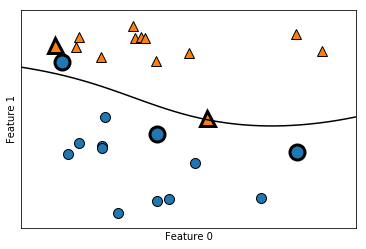

In [10]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

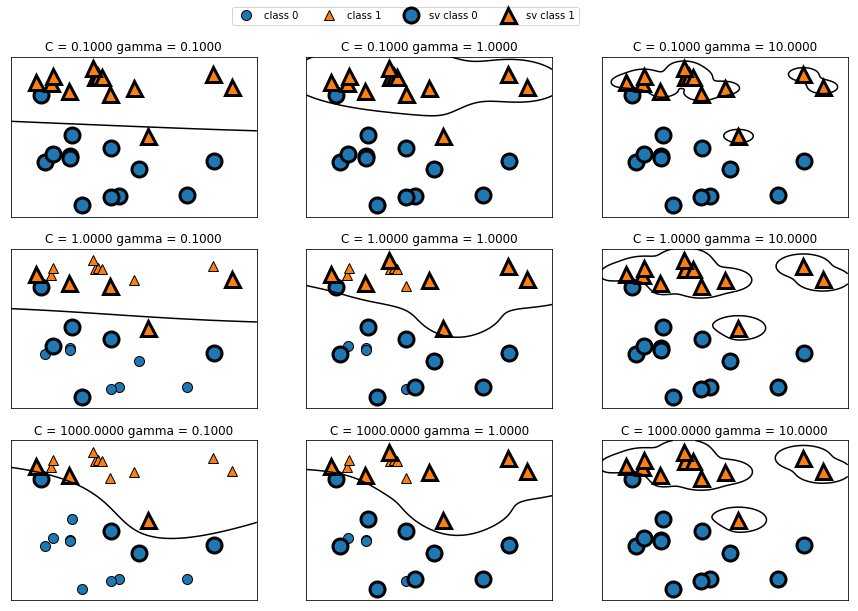

In [11]:
#svm パラメタ　調整
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax, C in zip(axes, [-1,0,3]):
    for a,gamma in zip(ax, range(-1,2)):
                      mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(0.9,1.2))